<a href="https://colab.research.google.com/github/efvillar/Butterfly-Recognition-DL/blob/main/ClasificadorMariposas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK CON EL CODIGO DE CLASIFICACION DE MARIPOSAS

In [18]:
#pip install "torch==1.4" "torchvision==0.5.0"

In [19]:
#!pip install fastai==1.0.61

In [20]:
#!pip install pillow==6.0

In [21]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

import warnings
warnings.filterwarnings("ignore")

In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'datos/mariposas/images'

Mounted at /content/drive


In [23]:
path = Path(base_dir)
print(path)

/content/drive/My Drive/datos/mariposas/images


In [24]:
!ls /content/drive/"My Drive"/datos/mariposas/images

american_copper  crimson_patched_longwing  monarch	   red_admiral
cabbage_white	 giant_swallowtail	   mourning_cloak  zebra_longwing
common_buckeye	 models			   painted_lady


In [25]:
bs = 16

In [26]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=224, 
                                  bs=bs, num_workers=8).normalize(imagenet_stats)

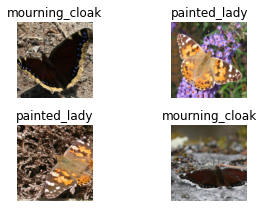

In [27]:
data.show_batch(rows=2, figsize=(5,3))

In [28]:
print(data.classes)
len(data.classes),data.c

['american_copper', 'cabbage_white', 'common_buckeye', 'crimson_patched_longwing', 'giant_swallowtail', 'monarch', 'mourning_cloak', 'painted_lady', 'red_admiral', 'zebra_longwing']


(10, 10)

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [30]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.389110,0.032091,0.000000,01:01
1,0.548968,0.012519,0.000000,00:24
2,0.286523,0.009631,0.006024,00:24
3,0.145045,0.009470,0.000000,00:24


In [32]:
learn.save('stage-1')

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

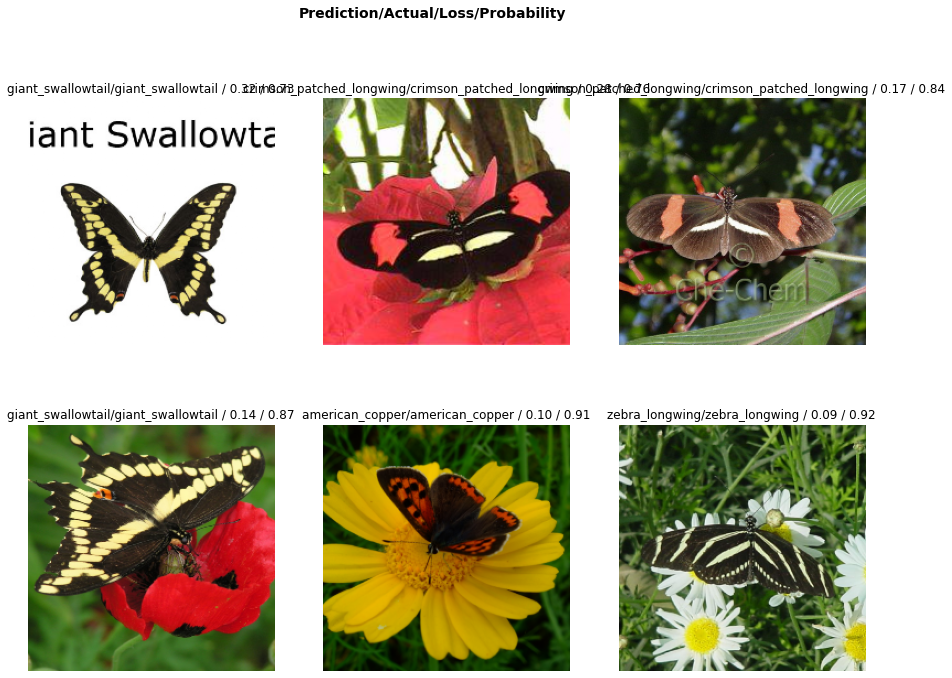

In [34]:
interp.plot_top_losses(6, figsize=(15,11))

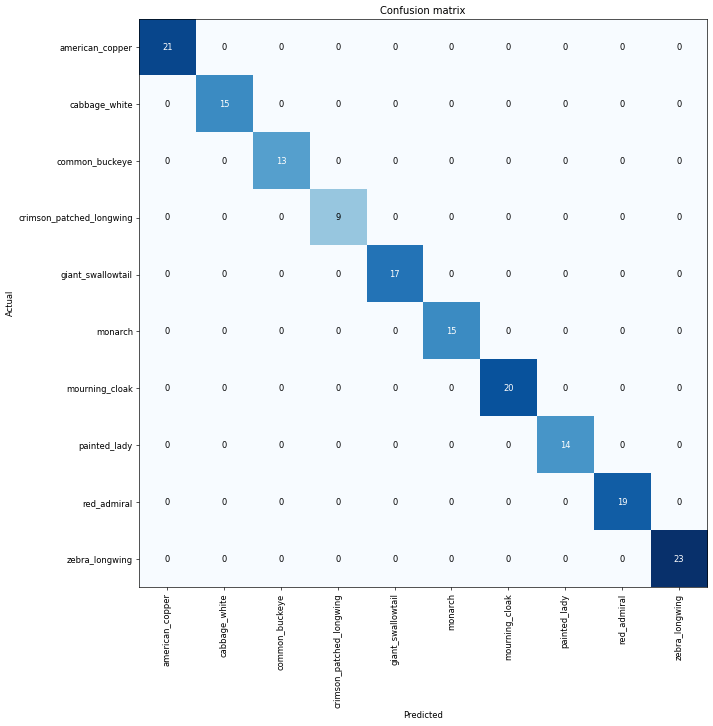

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.most_confused(min_val=1)

[]

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.265278,0.130006,0.036145,00:25


In [39]:
learn.load('stage-1');

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


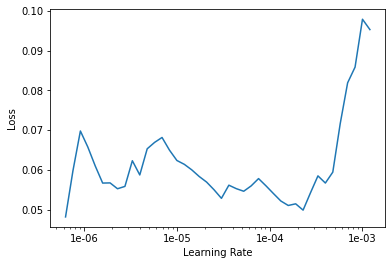

In [41]:
learn.recorder.plot()

In [42]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
#learn.fit_one_cycle(2, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.081384,0.005709,0.000000,00:24
1,0.085240,0.005255,0.000000,00:25


In [99]:
#learn.save('modelo_final')
learn.export('modelo_mariposas.pkl')

In [44]:
defaults.device = torch.device('cpu')

In [45]:
print(path)

/content/drive/My Drive/datos/mariposas/images


In [84]:
path_test = root_dir + 'datos/mariposas/images/test/'


In [68]:
print (path_test)

/content/drive/My Drive/datos/mariposas/images/test/mariposas/monarca1.jpg


In [91]:
!ls /content/drive/MyDrive/datos/mariposas/test

monarca1.jpg  zebra_longwing1.jpg


In [96]:
learn = load_learner(path)

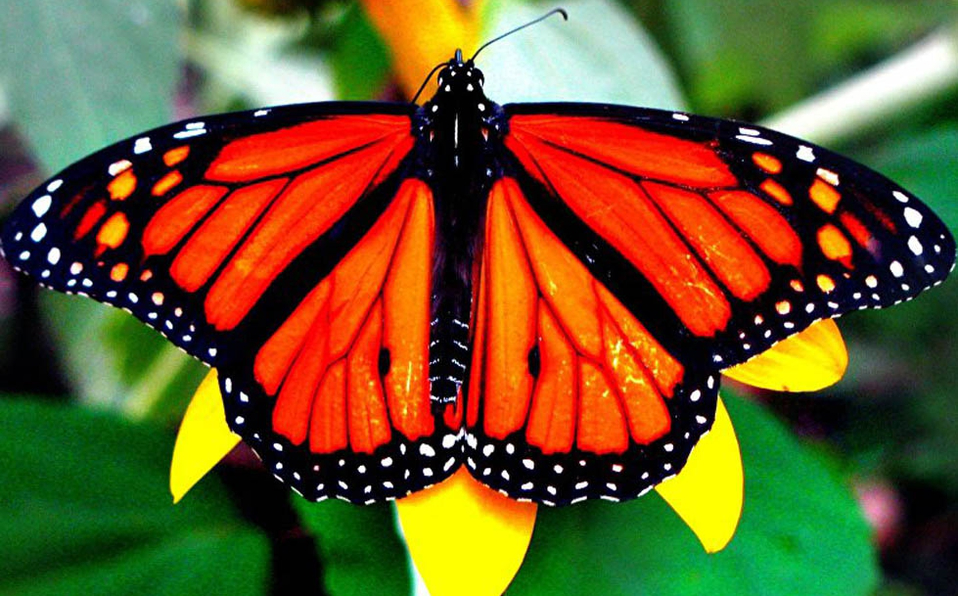

In [93]:
img = open_image('/content/drive/MyDrive/datos/mariposas/test/monarca1.jpg')
img

In [94]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

monarch


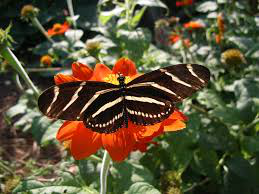

In [87]:
img = open_image('/content/drive/MyDrive/datos/mariposas/test/zebra_longwing1.jpg')
img

In [88]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

zebra_longwing
